# Regression Analysis

Author: Craig Wilcox

Date: 4/17/2025

Introduction: Using a Medical Cost data set I will be exploring, predicting target variables based on features, training a regression model, evaluating, and comparing approaches in a Jupyter notebook. There will also be a peer review section separate from this notebook.

In [28]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score, mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

## Section 1 - Import and Inspect Data

In [12]:
# Load Dataset
df = pd.read_csv("data/medicalcosts.csv")

# Display structure, check for missing values, and display first 10 rows
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Reflection 1

What do you notice about the dataset? Fairly simple data set with only 7 variables. There will be some good options for Regression analysis.

Are there any data issues? No missing data or data issues visible at this time.

## Section 2 - Data Exploration and Preperation
1. Explore Data patterns and distributions
2. Handle missing values and clean data (as applicable)
3. feature selection and engineering

array([[<Axes: xlabel='bmi', ylabel='bmi'>,
        <Axes: xlabel='age', ylabel='bmi'>,
        <Axes: xlabel='charges', ylabel='bmi'>],
       [<Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>],
       [<Axes: xlabel='bmi', ylabel='charges'>,
        <Axes: xlabel='age', ylabel='charges'>,
        <Axes: xlabel='charges', ylabel='charges'>]], dtype=object)

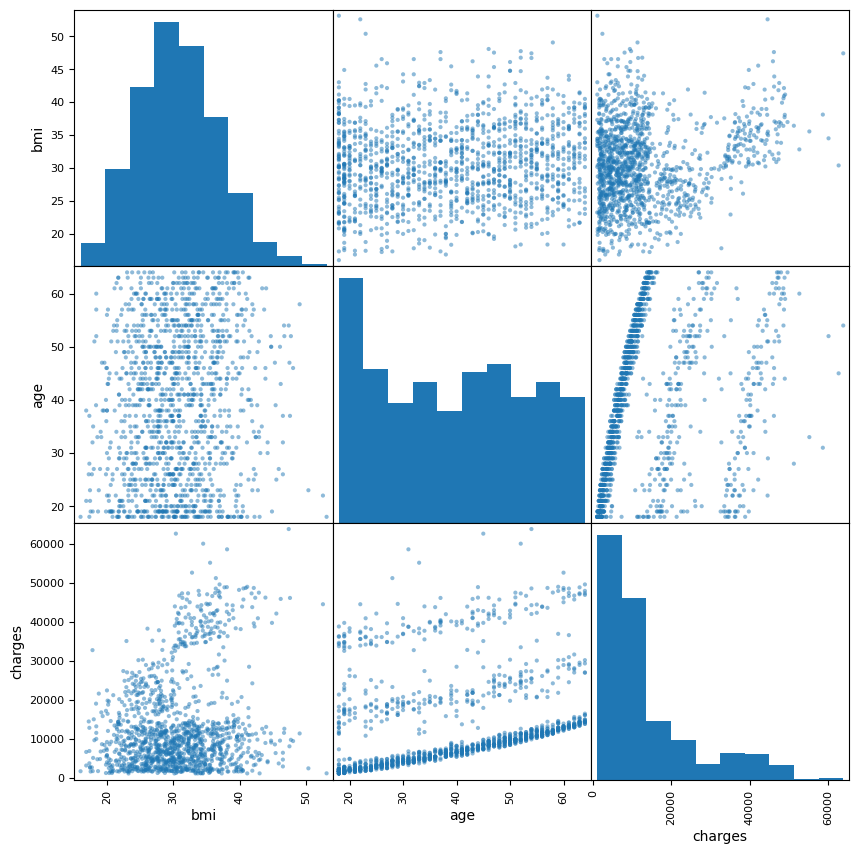

In [16]:
# Scatter matrix of numerical variables To inspect data

attributes = ['bmi', 'age', 'charges']
scatter_matrix(df[attributes], figsize=(10, 10))

In [13]:
print(df['smoker'].unique())

['yes' 'no']


In [14]:
# Convert smoking from categorical to numerical
df['smoker'] = df['smoker'].str.strip().str.lower()  # Clean spaces/casing
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

### Reflection 2

What patterns or anomalies do you see? There appears to be really good distribution of the data among charges and age.

Do any features stand out? There are some gaps in the charges that are surprising. A lot in the lower ranges but then gaps before the higher ranges

What preprocessing steps were necessary to clean and improve the data? There was no missing data but did need to change smoking status from categorical to numerical for easier analysis.

Did you create or modify any features to improve performance? Just changing smoking status from categorical to numerical.

## Section 3 - Feature Selection and Justification

In [23]:
# Feature cases
X1 = df[['age']]
X2 = df[['bmi']]
X3 = df[['smoker']]
y1 = df['charges']
y2 = df['charges']
y3 = df['charges']

### Reflection 3

Why did you choose these features? These features should all have a strong effect on amount of insurance charges based on the histograms earlier. The exception is smoker but this should effect the amount of charges as smoking typically effects health.

How might they impact predictions or accuracy? The histograms show very even distribution so I am predicting strong accuracy on results.

## Section 4 - Train Model

In [24]:
# Split data into training and test sets

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

In [25]:
# Create models 
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)

# Predictions
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

In [31]:
# Report performance
# Test 1
print("Test 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Test 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Test 1: Test RMSE:", np.sqrt(mean_squared_error(y1_test, y_pred_test1))) 
print("Test 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

# Test 2
print("Test 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Test 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Test 2: Test RMSE:", np.sqrt(mean_squared_error(y2_test, y_pred_test2)))  
print("Test 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

# Test 3
print("Test 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Test 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Test 3: Test RMSE:", np.sqrt(mean_squared_error(y3_test, y_pred_test3)))  
print("Test 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

Test 1: Training R²: 0.09974340762984268
Test 1: Test R²: 0.04849918805127251
Test 1: Test RMSE: 12061.518948133358
Test 1: Test MAE: 9304.084286581816
Test 2: Training R²: 0.03785048830789817
Test 2: Test R²: 0.04394143004792839
Test 2: Test RMSE: 12090.372213039602
Test 2: Test MAE: 9218.982188261447
Test 3: Training R²: 0.6055360832108917
Test 3: Test R²: 0.6730462472240667
Test 3: Test RMSE: 7070.344661897019
Test 3: Test MAE: 5396.760580537798


### Reflection 4

How well did the model perform? I used 3 tests and the model performed well once and it did not perform well in either of the first two tests.

Any surprises in the results? Yes, for me I thought that the model would have performed much better in the next section we will attempt either a different model or improve on it as it did not perform as well as expected.

## Section 5 - Improve the Model

In [29]:
# implement Pipeline 1: imputer -> StandardScaler -> Linear Regression using test 3
X_train = X3_train
X_test = X3_test
y_train = y3_train
y_test = y3_test

# Build the pipeline
pipeline = Pipeline([
    ('model', LinearRegression())                    # Linear Regression
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("✅ Test 3 Results with Pipeline")
print(f"R² Score  : {r2:.4f}")
print(f"MAE       : ${mae:,.2f}")
print(f"RMSE      : ${rmse:,.2f}")

✅ Test 3 Results with Pipeline
R² Score  : 0.6730
MAE       : $5,396.76
RMSE      : $7,070.34


In [30]:
# Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),          # Handle missing values
    ('poly_features', PolynomialFeatures(degree=3)),      # Add polynomial features (degree 3)
    ('scaler', StandardScaler()),                         # Standardize the features
    ('model', LinearRegression())                         # Linear Regression model
])

# Fit the pipeline on training data
pipeline2.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline2.predict(X_test)

# Evaluate the model's performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print evaluation results
print("✅ Test 3 Results with Pipeline 2 (Imputer → PolynomialFeatures → StandardScaler → LinearRegression)")
print(f"R² Score  : {r2:.4f}")
print(f"MAE       : ${mae:,.2f}")
print(f"RMSE      : ${rmse:,.2f}")

✅ Test 3 Results with Pipeline 2 (Imputer → PolynomialFeatures → StandardScaler → LinearRegression)
R² Score  : 0.6730
MAE       : $5,396.76
RMSE      : $7,070.34


### Reflection 5

Which models performed better? Pipeline 1 was the best performer. though it was very similar to pipline 2

How does scaling impact results? Without the scaling it appears the model struggled to handle the features and made errors and you can see that specifically in the RMSE scores.


## Section 6 - Final thoughts and Insights

- The data used was very clean and a good introductory dataset for new analysts to use and practice on as often errors come during cleaning and transforming the data which can cause errors during the analysis phase.
- During this analysis 3 features were used to predict insurance charges age, BMI, and whether or not the subject was a smoker. Based on the results only smoking was a moderate driver of charges.
- This was a surprise as based on initial analysis of the distribution of data I thought models would be able to predict better than they performed.
- With more time it would be interesting to know what are the drivers and what is missing to know what is causing the charges.

### Reflection 6

What did you learn from this project? Though predictions are important it is also important to go in with no expections of results and let the data speak for itself and instead start a project with a goal of finding truth within the data than trying to make a prediction true. I once had a mentor that said I can make data say anything I want but it is better to have the data speak what is true and that is what I am learning throughout this process.